In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import functools
import os

In [4]:
def create_graph(file_name):
    graph = nx.Graph()
    with open(file_name) as f:
        for line in f:
            vertex1, vertex2 ,_ = line.strip().split()
            graph.add_edge(vertex1, vertex2)
    return graph

In [5]:
def get_graph_info(graph):
    print("Number of nodes: ", graph.number_of_nodes())
    print("Number of edges: ", graph.number_of_edges())
    print("Average degree: ", np.mean(list(dict(graph.degree()).values())))
    print("Average clustering coefficient: ", nx.average_clustering(graph))

In [14]:
airport_edges = create_graph("./Data/airports.edges")
bible_edges = create_graph("./Data/bible.edges")
get_graph_info(airport_edges)
get_graph_info(bible_edges)

Number of nodes:  1574
Number of edges:  17215
Average degree:  21.874205844980942
Average clustering coefficient:  0.5041525392095769
Number of nodes:  1773
Number of edges:  9131
Average degree:  10.300056401579244
Average clustering coefficient:  0.7208188472780009


In [7]:
#closeness_centrality measure
def closeness_centrality(G, u=None, distance=None, wf_improved=True):

    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            nx.single_source_dijkstra_path_length, weight=distance)

    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = G.nodes
    else:
        nodes = [u]
    closeness_dict = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_dict[n] = _closeness_centrality
    if u is not None:
        return closeness_dict[u]
    return closeness_dict


In [34]:
def plot_centrality_of_two_graph(G1, G2 , centrality):
    centrality_list1 = list(centrality(G1).values())
    centrality_list2 = list(centrality(G2).values())
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(centrality_list1)), centrality_list1 , 'bo-')
    plt.plot(range(len(centrality_list2)), centrality_list2,'ro-')
    plt.show()

    #plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(centrality_list1,bins=len(centrality_list1), alpha=0.5, label='airport')
    plt.hist(centrality_list2, bins=len(centrality_list2), alpha=0.5, label='bible')
    plt.legend(loc='upper right')
    plt.show()
    



In [9]:
def write_to_file(filename, data , folder_path):
    #folder_path = 'output_files'

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # Open the file in write mode
    with open(os.path.join(folder_path, filename), "w") as file:
        # Write the data to the file
        if type(data) == list:
            for item in data:
                file.write(str(item)+'\n')
        elif type(data) == dict:
            for key, value in data.items():
                file.write(f'{key} : {value}\n')
        else:
            file.write(data)



In [12]:
path = './Results'

In [13]:
write_to_file('closeness_centrality_Bible_graph', closeness_centrality(bible_edges),folder_path = path)

In [15]:
write_to_file('closeness_centrality_airport_graph', closeness_centrality(airport_edges),folder_path = path)

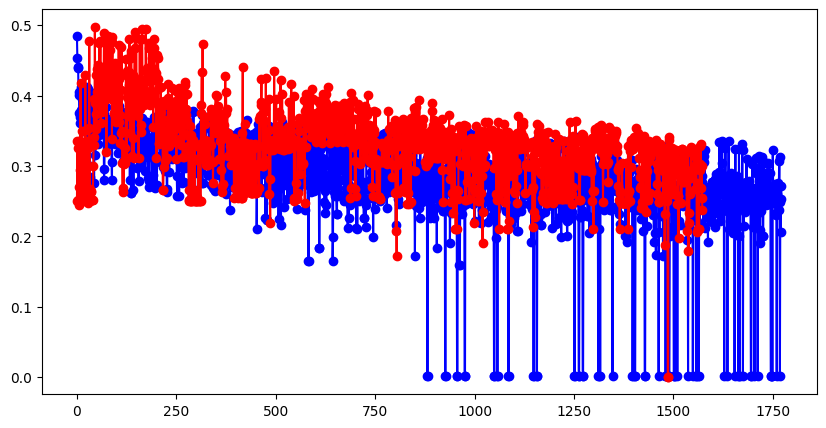

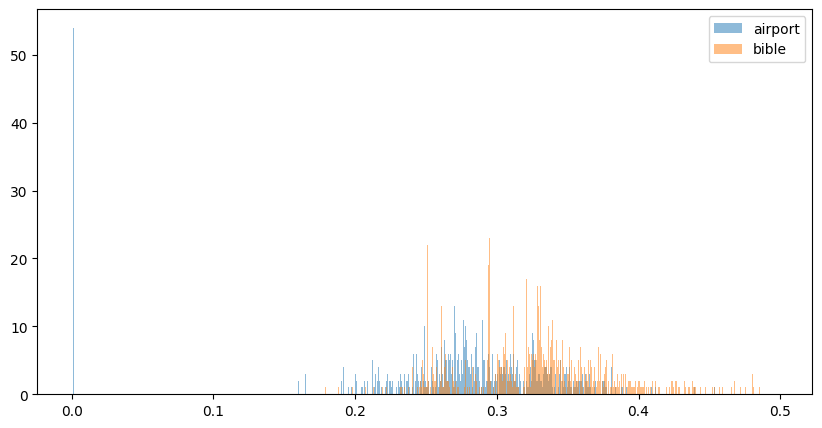

In [35]:
plot_centrality_of_two_graph(bible_edges, airport_edges ,closeness_centrality )

In [36]:
def efficiency_centrality(graph):
    results = []
    for start in graph:
        distances = {node: float('inf') for node in graph}
        distances[start] = 0
        queue = deque([start])
        while queue:
            current = queue.popleft()
            for neighbor in graph[current]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        results.append(list(distances.values()))

    results = np.array(results)
    results[np.isinf(results)] = 0

    dic = {}
    for i in range(0,len(results)):
        x = sum(results[i,:]) / len(results)
        dic[i] = x
    return dic



In [37]:
def degree_centrality(graph):
    dic = {}
    for node in graph.nodes:
        dic[node] = graph.degree(node) / graph.number_of_nodes()
    return dic

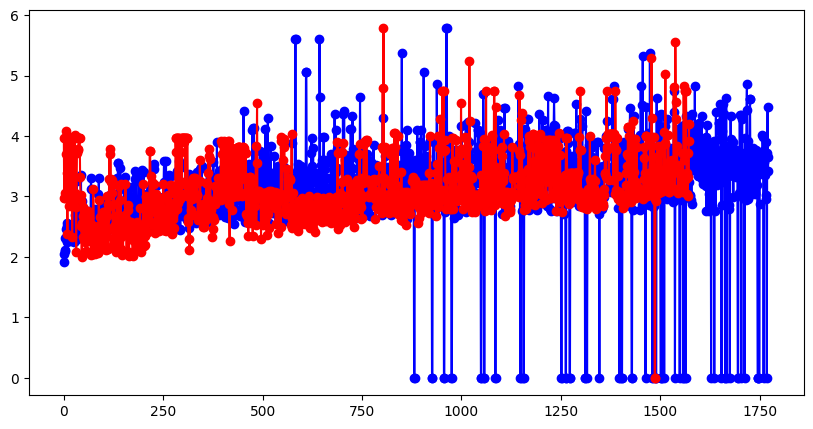

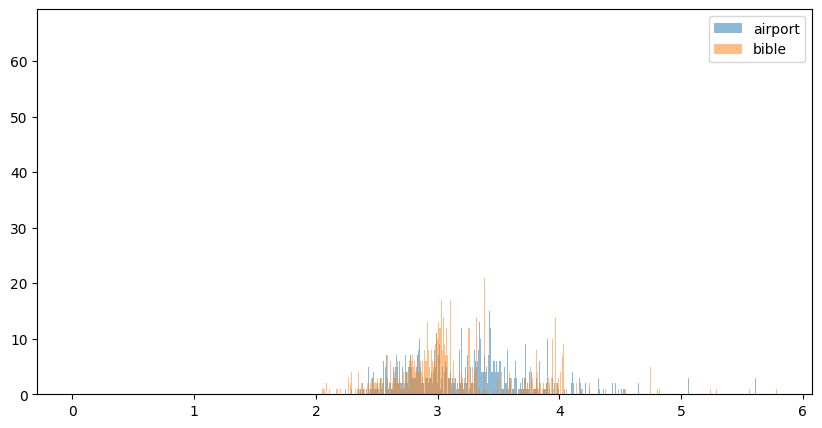

In [38]:
write_to_file('efficiency_centrality_airport_graph', efficiency_centrality(airport_edges),folder_path = path)  
write_to_file('efficiency_centrality_bible_graph', efficiency_centrality(bible_edges),folder_path = path)
plot_centrality_of_two_graph(bible_edges, airport_edges , efficiency_centrality)

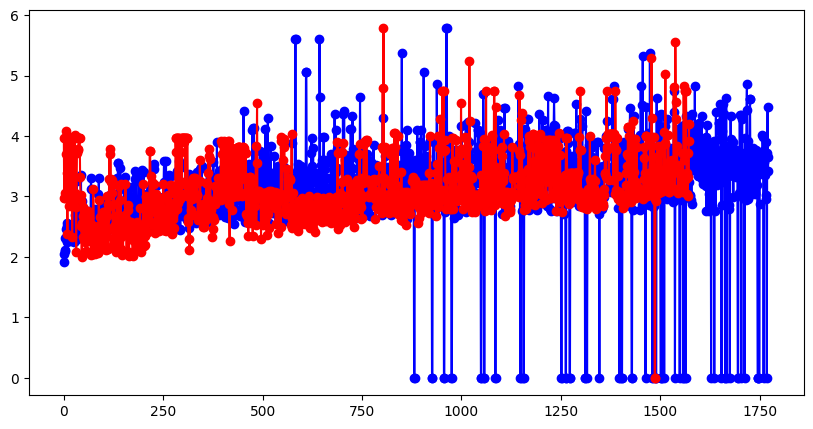

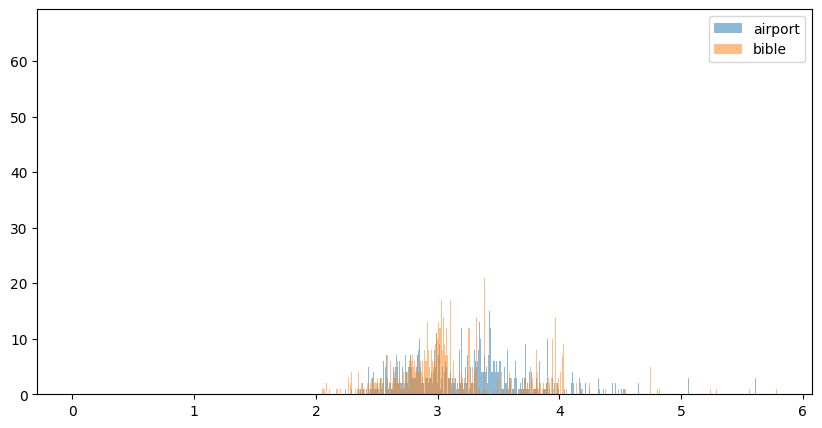

In [39]:
write_to_file('degree_centrality_airport_graph', degree_centrality(airport_edges),folder_path = path)
write_to_file('degree_centrality_bible_graph', degree_centrality(bible_edges),folder_path = path)
plot_centrality_of_two_graph(bible_edges, airport_edges , efficiency_centrality)